In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn import preprocessing

df = pd.read_csv('./000001.csv') 

print(np.shape(df))
df.head()

(611, 14)


,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2019-05-30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39
1,2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95
2,2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
3,2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
4,2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98


In [4]:

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# TODO: 按照时间升序排列数据, 使用df中的sort_values函数
df.sort_values(by=['date'],inplace=True,ascending=True)

df.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2016-11-29,9.59,9.70,9.62,9.55,887779.19,-0.01,-0.10,9.620,9.620,9.620,887779.19,887779.19,887779.19
2016-11-30,9.65,9.72,9.55,9.50,1025963.06,-0.07,-0.73,9.585,9.585,9.585,956871.13,956871.13,956871.13
2016-12-01,9.57,9.63,9.60,9.55,646004.38,0.05,0.52,9.590,9.590,9.590,853248.88,853248.88,853248.88
2016-12-02,9.60,9.60,9.55,9.44,829686.50,-0.05,-0.52,9.580,9.580,9.580,847358.28,847358.28,847358.28
2016-12-05,9.50,9.54,9.46,9.41,764365.69,-0.09,-0.94,9.556,9.556,9.556,830759.76,830759.76,830759.76
2016-12-06,9.48,9.52,9.49,9.45,602902.75,0.03,0.32,9.530,9.545,9.545,773784.48,792783.60,792783.60
2016-12-07,9.48,9.49,9.48,9.41,493404.75,-0.01,-0.10,9.516,9.536,9.536,667272.81,750015.19,750015.19
2016-12-08,9.50,9.55,9.52,9.43,671452.19,0.04,0.42,9.500,9.534,9.534,672362.38,740194.81,740194.81
2016-12-09,9.50,9.75,9.65,9.48,1514199.25,0.13,1.37,9.520,9.547,9.547,809264.93,826195.31,826195.31


In [5]:
# 检测是否有缺失数据 NaNs
df.dropna(axis=0 , inplace=True)
df.isna().sum()

open            0
high            0
close           0
low             0
volume          0
price_change    0
p_change        0
ma5             0
ma10            0
ma20            0
v_ma5           0
v_ma10          0
v_ma20          0
dtype: int64

In [6]:
min_date = df.index.min()
max_date = df.index.max()
print ("First date is",min_date)
print ("Last date is",max_date)

First date is 2016-11-29 00:00:00
Last date is 2019-05-30 00:00:00


In [8]:
# 创建新的一列（预测值）。预测值为5天之后的收盘价，使用shift函数来实现。 
# TODO： 
num = 5 # 预测5天后的情况
df['label'] = df['close'].shift(-num)
print(df.shape)

(611, 14)


In [9]:
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2019-05-17,12.92,12.93,12.44,12.36,965000.88,-0.41,-3.19,12.600,12.626,13.411,925681.34,1153473.43,1138638.70,12.35
2019-05-20,12.35,12.54,12.38,12.25,786435.19,-0.06,-0.48,12.616,12.577,13.312,934584.83,1021250.17,1127754.97,12.37
2019-05-21,12.40,12.73,12.56,12.36,731210.50,0.18,1.45,12.630,12.538,13.223,844307.30,987105.38,1138963.23,12.49
2019-05-22,12.57,12.57,12.40,12.32,506230.72,-0.16,-1.27,12.526,12.518,13.107,724755.75,940183.37,1101972.96,12.40
2019-05-23,12.24,12.42,12.29,12.14,666855.44,-0.11,-0.89,12.414,12.531,13.014,731146.55,851153.75,1069202.04,12.22
2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98,NaN
2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10,NaN
2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43,NaN
2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95,NaN


In [10]:
# 由于数据往前移了5位，所以最后5个样本的label值为"NA"，在这里去掉包含”NA"的样本。 
df.dropna(inplace=True)
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2019-05-10,12.34,12.75,12.68,12.10,1192399.00,0.52,4.28,12.652,13.357,13.709,1381265.51,1312421.48,1221722.48,12.44
2019-05-13,12.33,12.54,12.30,12.23,741917.75,-0.38,-3.00,12.538,13.143,13.637,1107915.51,1191640.89,1211461.61,12.38
2019-05-14,12.20,12.75,12.49,12.16,1182598.12,0.19,1.54,12.446,12.979,13.585,1129903.46,1198753.07,1237823.69,12.56
2019-05-15,12.58,13.11,12.92,12.57,1103988.50,0.43,3.44,12.510,12.892,13.560,1155611.00,1208209.79,1254306.88,12.40
2019-05-16,12.93,12.99,12.85,12.78,634901.44,-0.07,-0.54,12.648,12.767,13.518,971160.96,1168630.36,1209357.42,12.29
2019-05-17,12.92,12.93,12.44,12.36,965000.88,-0.41,-3.19,12.600,12.626,13.411,925681.34,1153473.43,1138638.70,12.35
2019-05-20,12.35,12.54,12.38,12.25,786435.19,-0.06,-0.48,12.616,12.577,13.312,934584.83,1021250.17,1127754.97,12.37
2019-05-21,12.40,12.73,12.56,12.36,731210.50,0.18,1.45,12.630,12.538,13.223,844307.30,987105.38,1138963.23,12.49
2019-05-22,12.57,12.57,12.40,12.32,506230.72,-0.16,-1.27,12.526,12.518,13.107,724755.75,940183.37,1101972.96,12.40


In [12]:
# 构建特征向量X，也就是数据中的X。由于我们要预测df['label']值，需要先去掉，不然就失去预测意义了。 另外，
# 在本次预测任务中先不考虑"price_change"和"p_change"两个字段。 
X = df.drop(['price_change', 'label', 'p_change'],axis=1)
X = X.values

# TODO： 使用z-score normalization做归一化，参考preprocessing模块里的scale函数的使用
X = preprocessing.scale(X)
print(X)

[[-0.76502839 -0.75825798 -0.75279219 ... -0.2705086  -0.29105361
  -0.31108821]
 [-0.72697009 -0.74610002 -0.79699562 ... -0.13577663 -0.14605947
  -0.15337543]
 [-0.77771449 -0.80081087 -0.76542174 ... -0.33784405 -0.36351782
  -0.38990885]
 ...
 [ 1.01736875  1.08367423  1.10375203 ... -0.35528048 -0.08261084
   0.26227725]
 [ 1.12520061  0.98641049  1.00271561 ... -0.58841065 -0.18107987
   0.17784138]
 [ 0.91587995  0.89522572  0.93325307 ... -0.57594834 -0.36791459
   0.10303682]]


In [13]:
# 提取预测值
y = df.label.values

In [14]:
print(np.shape(X), np.shape(y))

(606, 11) (606,)


In [15]:
# 把数据分为训练和测试数据。我们把一开始的550个样本作为训练数据，之后的样本作为
# 测试数据
X_train, y_train = X[0:550, :], y[0:550]
X_test, y_test = X[550:606,:], y[550:606]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(550, 11)
(550,)
(56, 11)
(56,)


In [19]:
# 训练线性回归模型

# TODO：导入相应的线性回归库
from sklearn.linear_model import LinearRegression 

# TODO: 在训练数据上训练线性回归模型
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [20]:
lr.score(X_test, y_test)

0.049300406483855586

In [21]:
# 输出针对最后五个样本的预测，以及真实值
x_predict = X[-100:]  # 选取最新的100个样本
forcast = lr.predict(x_predict) # 预测

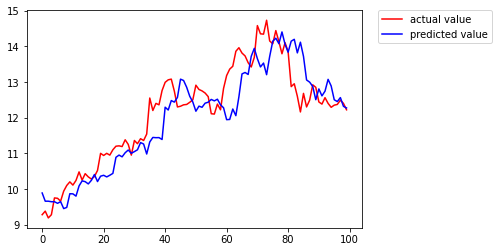

In [22]:
plt.plot(y[-100:], color='r' , label="actual value")  
plt.plot(forcast, color='b', label="predicted value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [23]:
for idx, col_name in enumerate(['open', 'high', 'close', 'low', 'volume', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20']):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

The coefficient for open is -0.7623399996475224
The coefficient for high is 0.8321435171405436
The coefficient for close is 0.2446370537523883
The coefficient for low is 1.0914155504935472
The coefficient for volume is 0.00438079375691286
The coefficient for ma5 is -0.3071753501946545
The coefficient for ma10 is 0.19354310799475755
The coefficient for ma20 is 0.24902077484698226
The coefficient for v_ma5 is 0.17472336466033628
The coefficient for v_ma10 is 0.08873934447969872
The coefficient for v_ma20 is -0.2791070269442077
